# Israel Credit Market  - Basic Ampirics 
## the leverage ratio for most sigments
#### Nimrod Cohen
#### November 2020
the aim is to calculate leverage for:
a. the main sigmentation:
* HH
    * Business vs HHs (housing vs nonhousing)
    * also real vs nominal debt

## This Notebook: Analyses the  Data
* Leverage vs Spread
* Leverage vs Future Growth


## Beack to Data!

In [1]:
## Using Jupter and IDE (VScode\Spyder\Atom) Together  https://medium.com/@rrfd/cookiecutter-data-science-organize-your-projects-atom-and-jupyter-2be7862f487e
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# my functions and oter iports
import src.config as config
from src.config import my_pd as pd
from src.config import my_plt as plt
from src.config import my_colors as colors
file_date = config.file_date
from src.funct import ncDate,ncPlot,ncStat
from src.funct.ncDate import period
from src.funct.ncPlot import multi_save, add_Rec, plot1ax, plot2axs
from src.funct.ncStat import ols_fit,regs_plot

import os
# very importent - get Project Main Path
project_path = config.project_path
current_NB_path='src/models/'
os.chdir(project_path)

In [3]:
import numpy as np
import statsmodels as st
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# %matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

In [5]:
import src.data.read_from_Fred as fred
path='data/processed/'
df_US   = fred.Get_data(path)

## Leverage vs Spread


In [6]:
path = 'data/processed/' 
df_ISR= ncDate.Get_data(path+'ISR_data.csv')
df_BanksCredit = ncDate.Get_data(path+'ISR_Banks_data.csv')

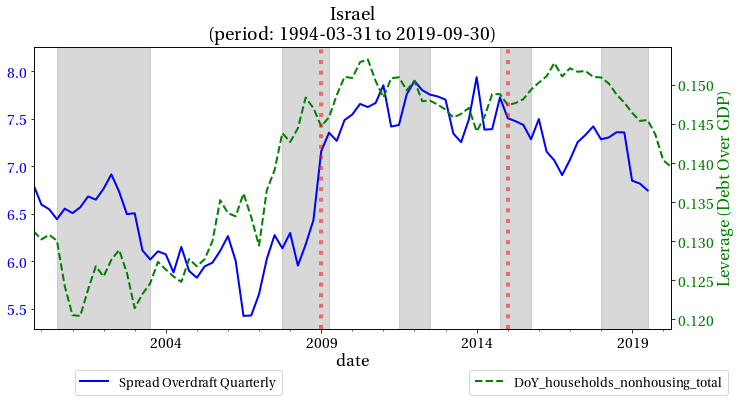

In [7]:
#with plt.xkcd():
if True:
    colY=['Spread Overdraft Quarterly']
    colX=['DoY_households_nonhousing_total']
    start = str(df_ISR[colY].dropna().index[0].date())    
    end = str(df_ISR[colY].dropna().index[-1].date())    
    mask = period(df_ISR.index,start=start)#start = '2015-02-01'

    ax1,ax2 = plot2axs(columns1=colY,columns2=colX,
                       ylabel1 ='% Spread ' , ylabel2='Leverage (Debt Over GDP)',
                       df=df_ISR.loc[mask,colY+colX],
                       markers=['',''],linestyles=['-','--'],
                       bbox1=(0.4, -0.12),bbox2=(1.1, -0.12))    
    add_Rec(ax1,df_US,'ISRRECM')
    ax2.set_title('Israel \n (period: '+start+' to '+end+')')    
    ax2.axvline(x='2009-03-31' ,linewidth=4, color=colors[2],linestyle=':',alpha=0.5)
    ax2.axvline(x='2015-03-31' ,linewidth=4, color=colors[2],linestyle=':',alpha=0.5)
    multi_save(name = config.figs_path+'Lev_Spread_ISR')

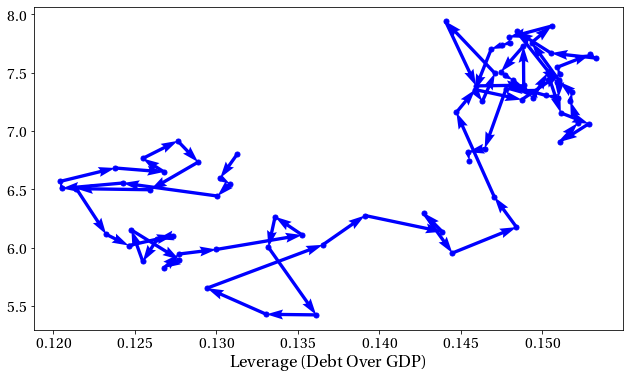

In [8]:
ncPlot.path_in2D(columnX =colX[0], columnY=colY[0],  df=df_ISR, ylabel ='% Spread', xlabel='Leverage (Debt Over GDP)',marker='.');

# Leverage vs Futaure Growth

In [26]:
#ncStat.col_that('YoY',ncStat.col_that('debt',df_ISR.columns))

## Real Growth on Future Real Growth

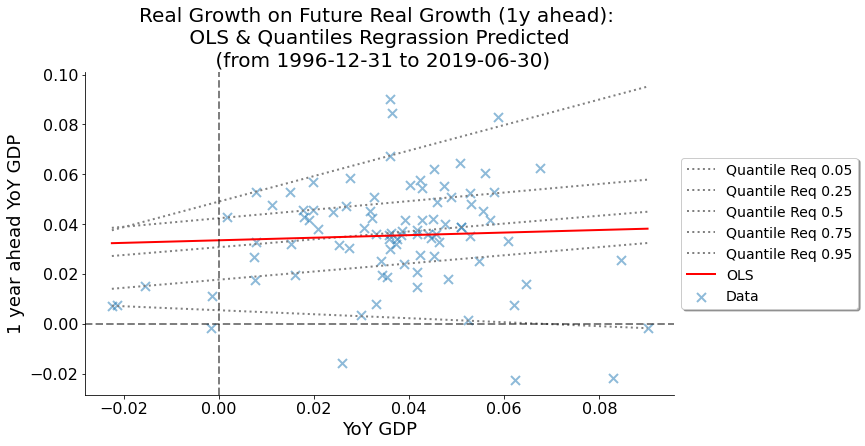

In [11]:
x_name = 'GDP.Q_FP_YoY'    
y_name = 'GDP.Q_FP_YoY_1Y_ahead'
to_Q_reg = df_ISR[[x_name,y_name]].dropna()
ax = regs_plot(x_name=x_name, y_name=y_name, df=to_Q_reg,labelX='YoY GDP',labelY='1 year ahead YoY GDP')
ax.set_title('Real Growth on Future Real Growth (1y ahead): \n OLS & Quantiles Regrassion Predicted \n (from '+str(to_Q_reg.index[0].date())+' to '+str(to_Q_reg.index[-1].date())+')');

## Total Debt on Future Real Growth

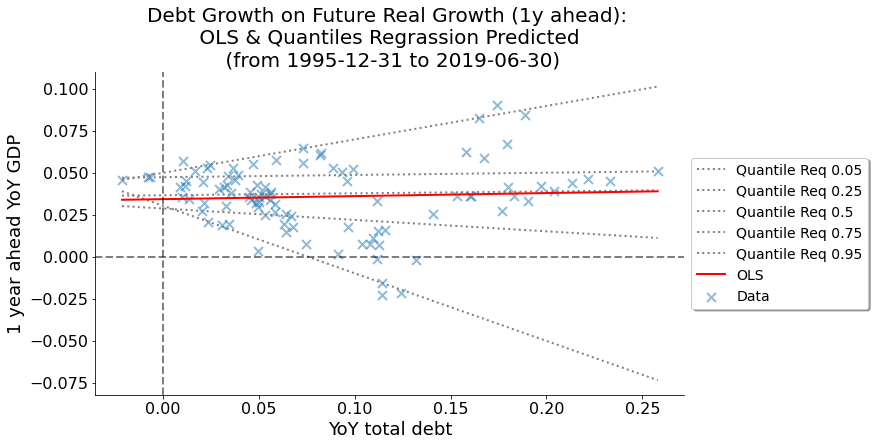

In [12]:
x_name = 'debt_total_YoY'    
y_name = 'GDP.Q_FP_YoY_1Y_ahead'
to_Q_reg = df_ISR[[x_name,y_name]].dropna()
ax = regs_plot(x_name=x_name, y_name=y_name, df=to_Q_reg,labelX='YoY total debt',labelY='1 year ahead YoY GDP')
ax.set_title('Debt Growth on Future Real Growth (1y ahead): \n OLS & Quantiles Regrassion Predicted \n (from '+str(to_Q_reg.index[0].date())+' to '+str(to_Q_reg.index[-1].date())+')');

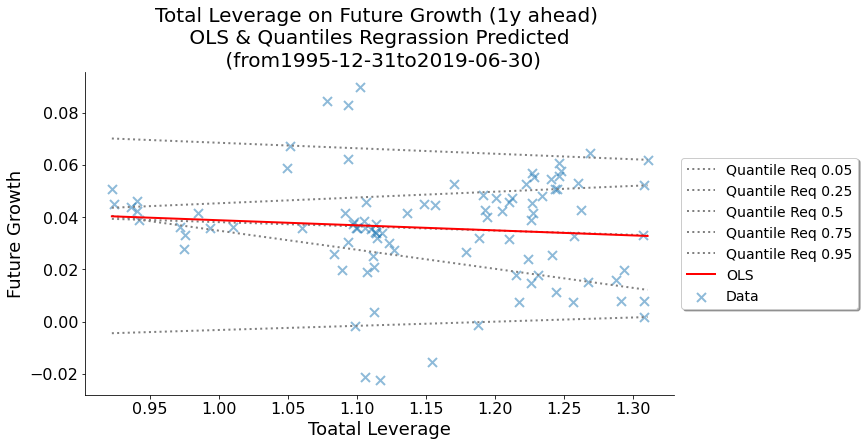

In [13]:
x_name = 'DoY_total'    
y_name = 'GDP.Q_FP_YoY_1Y_ahead' # Q_N_YoY_1Y_ahead
to_Q_reg = df_ISR[[x_name,y_name]].dropna()
ax = regs_plot(x_name=x_name, y_name=y_name, df=to_Q_reg, labelX='Toatal Leverage',labelY='Future Growth',add_00_grid=False)
ax.set_title('Total Leverage on Future Growth (1y ahead) \n OLS & Quantiles Regrassion Predicted \n (from'+str(to_Q_reg.index[0].date())+'to'+str(to_Q_reg.index[-1].date())+')');

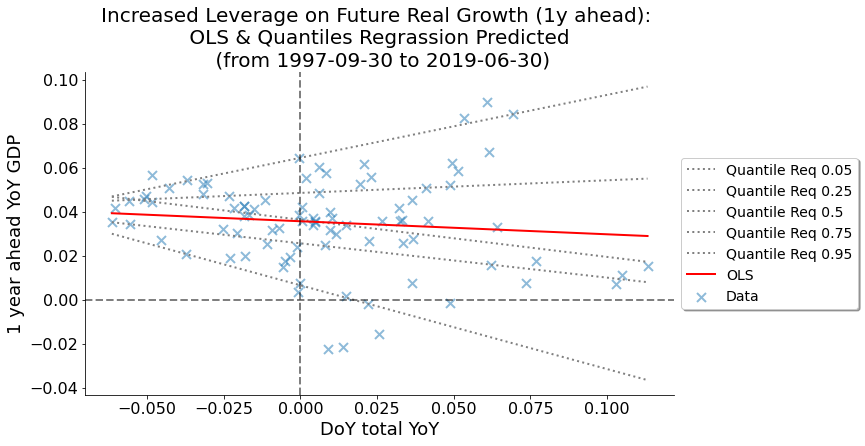

In [14]:
x_name = 'DoY_total_YoY'    
y_name = 'GDP.Q_FP_YoY_1Y_ahead'
to_Q_reg = df_ISR[[x_name,y_name]].dropna()
ax = regs_plot(x_name=x_name, y_name=y_name, df=to_Q_reg,labelX='DoY total YoY',labelY='1 year ahead YoY GDP')
ax.set_title('Increased Leverage on Future Real Growth (1y ahead): \n OLS & Quantiles Regrassion Predicted \n (from '+str(to_Q_reg.index[0].date())+' to '+str(to_Q_reg.index[-1].date())+')');

## HH nonhousing Debt on Future Real Growth

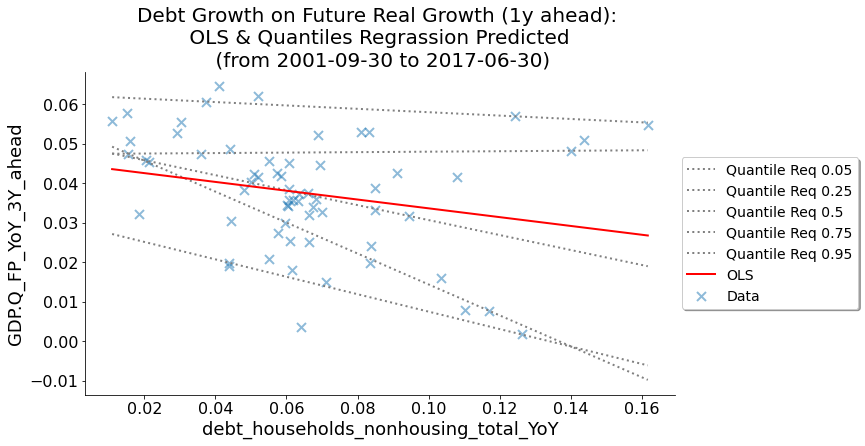

In [15]:
x_name = 'debt_households_nonhousing_total_YoY' 
#x_name = 'debt_business_sector_YoY'
#x_name = 'debt_households_YoY'
y_name = 'GDP.Q_FP_YoY_3Y_ahead'
to_Q_reg = df_ISR[[x_name,y_name]].dropna()
ax = regs_plot(x_name=x_name, y_name=y_name, df=to_Q_reg,add_00_grid=False)
ax.set_title('Debt Growth on Future Real Growth (1y ahead): \n OLS & Quantiles Regrassion Predicted \n (from '+str(to_Q_reg.index[0].date())+' to '+str(to_Q_reg.index[-1].date())+')');

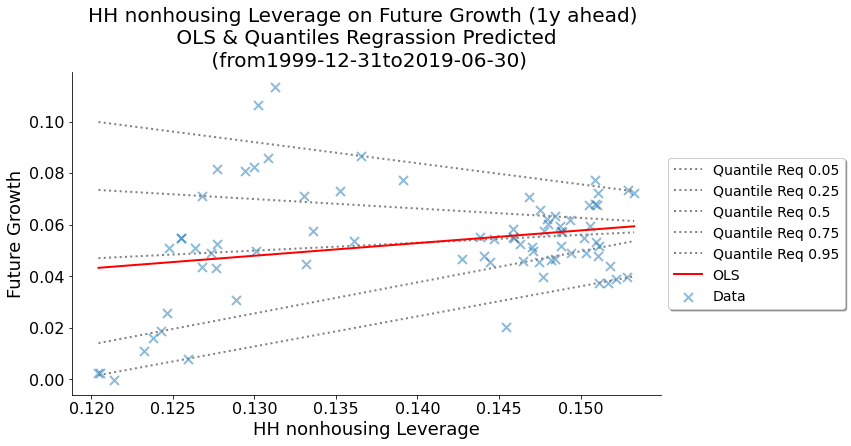

In [16]:
x_name = 'DoY_households_nonhousing_total'    
y_name = 'GDP.Q_N_YoY_1Y_ahead'
to_Q_reg = df_ISR[[x_name,y_name]].dropna()
ax = regs_plot(x_name=x_name, y_name=y_name, df=to_Q_reg, labelX='HH nonhousing Leverage',labelY='Future Growth',add_00_grid=False)
ax.set_title('HH nonhousing Leverage on Future Growth (1y ahead) \n OLS & Quantiles Regrassion Predicted \n (from'+str(to_Q_reg.index[0].date())+'to'+str(to_Q_reg.index[-1].date())+')');

C:\Users\u30l\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


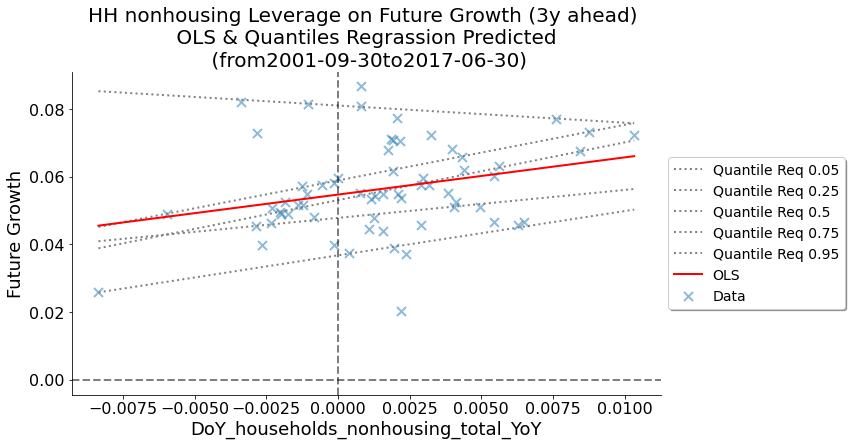

In [17]:
x_name = 'DoY_households_nonhousing_total_YoY'    
y_name = 'GDP.Q_N_YoY_3Y_ahead'
to_Q_reg = df_ISR[[x_name,y_name]].dropna()
ax = regs_plot(x_name=x_name, y_name=y_name, df=to_Q_reg, labelY='Future Growth')
ax.set_title('HH nonhousing Leverage on Future Growth (3y ahead) \n OLS & Quantiles Regrassion Predicted \n (from'+str(to_Q_reg.index[0].date())+'to'+str(to_Q_reg.index[-1].date())+')');

## Business sector Debt on Future Real Growth

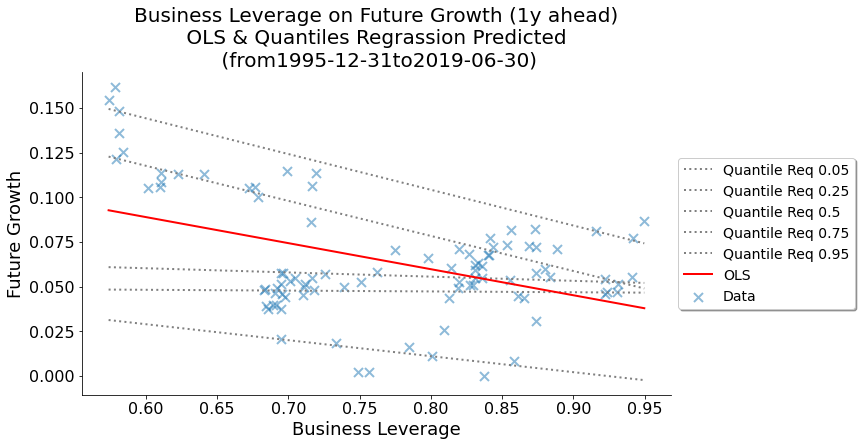

In [18]:
x_name = 'DoY_business_sector'    
y_name = 'GDP.Q_N_YoY_1Y_ahead'
to_Q_reg = df_ISR[[x_name,y_name]].dropna()
ax = regs_plot(x_name=x_name, y_name=y_name, df=to_Q_reg, labelX='Business Leverage',labelY='Future Growth',add_00_grid=False)
ax.set_title('Business Leverage on Future Growth (1y ahead)\n OLS & Quantiles Regrassion Predicted \n (from'+str(to_Q_reg.index[0].date())+'to'+str(to_Q_reg.index[-1].date())+')');

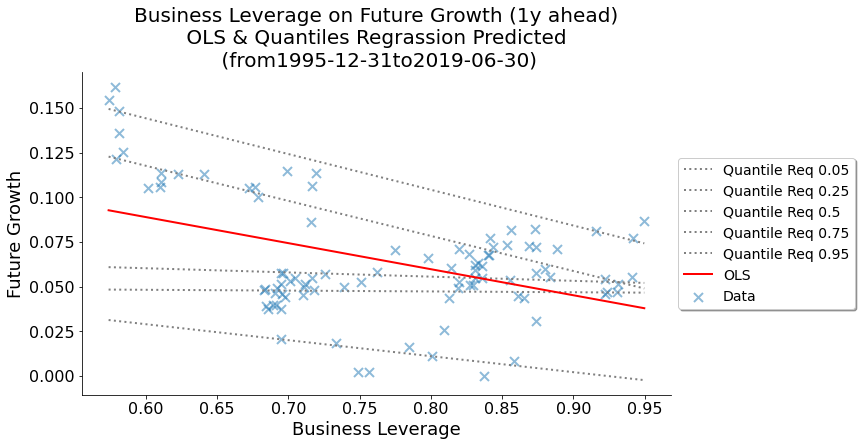

In [19]:
x_name = 'DoY_business_sector'    
y_name = 'GDP.Q_N_YoY_1Y_ahead'
to_Q_reg = df_ISR[[x_name,y_name]].dropna()
ax = regs_plot(x_name=x_name, y_name=y_name, df=to_Q_reg, labelX='Business Leverage',labelY='Future Growth',add_00_grid=False)
ax.set_title('Business Leverage on Future Growth (1y ahead)\n OLS & Quantiles Regrassion Predicted \n (from'+str(to_Q_reg.index[0].date())+'to'+str(to_Q_reg.index[-1].date())+')');

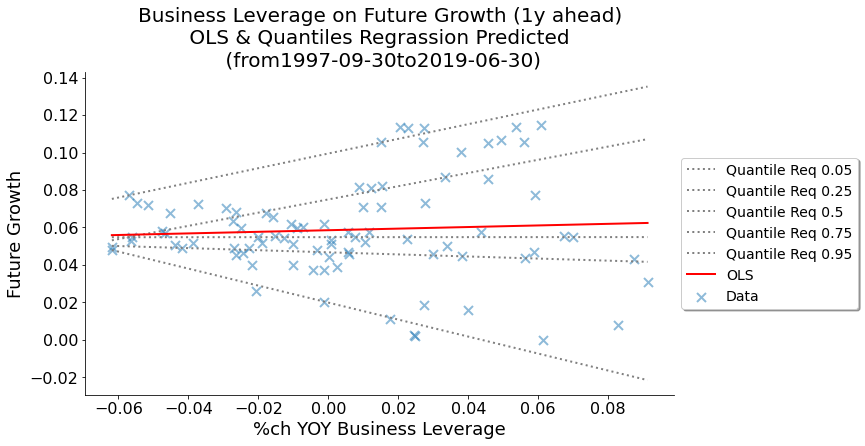

In [20]:
x_name = 'DoY_business_sector_YoY'    
y_name = 'GDP.Q_N_YoY_1Y_ahead'
to_Q_reg = df_ISR[[x_name,y_name]].dropna()
ax = regs_plot(x_name=x_name, y_name=y_name, df=to_Q_reg, labelX='%ch YOY Business Leverage',labelY='Future Growth',add_00_grid=False)
ax.set_title('Business Leverage on Future Growth (1y ahead)\n OLS & Quantiles Regrassion Predicted \n (from'+str(to_Q_reg.index[0].date())+'to'+str(to_Q_reg.index[-1].date())+')');

## Spread vs Leverage

In [ ]:
mask = period(df_ISR.index,start='1999-01-01')

linestyle = ['-','--',':']

#with plt.xkcd():
if True:
    colY=['Spread Overdraft Quarterly']
    colX=['DoY_households_nonhousing_total']
    start = str(df_ISR[colY].dropna().index[0].date())    
    end = str(df_ISR[colY].dropna().index[-1].date())    
    mask = period(df_ISR.index,start=start)#start = '2015-02-01'

    ax1,ax2 = plot2axs(columns1=colY,columns2=colX,
                       ylabel1 ='% Spread ' , ylabel2='Leverage (Debt Over GDP)',
                       df=df_ISR.loc[mask,colY+colX],
                       markers=['',''],colors=['b','r'],linestyles=['-','--'],
                       bbox1=(0.4, -0.12),bbox2=(1.1, -0.12))    
    add_Rec(ax1,df_US,'ISRRECM')
    ax2.set_title('Israel \n (period: '+start+' to '+end+')')    
    ax2.axvline(x='2009-03-31' ,linewidth=4, color=colors[2],linestyle=':',alpha=0.5)
    ax2.axvline(x='2015-03-31' ,linewidth=4, color=colors[2],linestyle=':',alpha=0.5)
    multi_save(name = config.figs_path+'Lev_Spread_ISR')

In [ ]:
mask = period(df_IRs.index,start='1999-01-01')

#with plt.xkcd():
if True:
    color = colors[0]
    ax1 = df_IRs.loc[mask,['Spread Overdraft Quarterly']].dropna().plot(color=color,legend=None)
    ax1.set_ylabel(ylabel='Overdraft Spread',color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = colors[1]
    ax2.set_ylabel('Debt-over-GDP', color=color)  # we already handled the x-label with ax1
    df_Amount['DoY'].dropna().plot(ax =ax2 ,color=color,legend=None)
    #(df_Amount[['Consumption MA']]/df_Amount[['Consumption MA']].mean()).dropna().plot(ax =ax2 ,color=color,linestyle=':',legend=None)

    #df_Amount[[DtY]].dropna().interpolate(method='spline', order=1).plot(ax =ax2 ,color='r',linestyle='--',legend=None)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.axhline(y=df_Amount['DoY'].mean() ,linewidth=2, color=color,linestyle='--')

    color = colors[2]
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('axes', 1.15))
    df_IRs.loc[mask,['Overdraft IR Quarterly']].dropna().plot(ax=ax3,color=color,linestyle=':',legend=None)
    #df_FinMarket.loc[mask,['Borrowers IR (BER model) Quarterly']].dropna().plot(ax=ax3,color=color,
    #                                                                            linestyle=':',legend=None)
    ax3.tick_params(axis='y', labelcolor=color)
    ax3.set_ylabel(ylabel='Borrowers-IR',color=color)
    add_Rec(ax1,df_US,'ISRRECM',alpha=0.2)

#    multi_save(name = '../../Figs/Israel_Spread_n_Leverage')

In [ ]:
df_Amount['%D DoY'] = df_Amount['DoY'] / df_Amount['DoY'].shift(periods=+1) - 1
df_IRs['%D Spread Overdraft Quarterly'] =  df_IRs['Spread Overdraft Quarterly']  \
                                                / df_IRs['Spread Overdraft Quarterly'].shift(periods=+3) - 1

In [ ]:
colors = list(mcolors.BASE_COLORS) # mcolors.TABLEAU_COLORS
mask = period(df_IRs.index,start='1999-01-01')

#with plt.xkcd():
if True:
    color = colors[0]
    ax1 = df_IRs.loc[mask,['%D Spread Overdraft Quarterly']].dropna().plot(color=color,legend=None)
    ax1.set_ylabel(ylabel='%D Overdraft Spread',color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = colors[1]
    ax2.set_ylabel('%D Debt-over-GDP', color=color)  # we already handled the x-label with ax1
    df_Amount['%D DoY'].dropna().plot(ax =ax2 ,color=color,legend=None)
    #(df_Amount[['Consumption MA']]/df_Amount[['Consumption MA']].mean()).dropna().plot(ax =ax2 ,color=color,linestyle=':',legend=None)

    #df_Amount[[DtY]].dropna().interpolate(method='spline', order=1).plot(ax =ax2 ,color='r',linestyle='--',legend=None)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.axhline(y=df_Amount['%D DoY'].mean() ,linewidth=2, color=color,linestyle='--')

    color = colors[2]
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('axes', 1.15))
    df_IRs.loc[mask,['Overdraft IR Quarterly']].dropna().plot(ax=ax3,color=color,linestyle=':',legend=None)
    #df_FinMarket.loc[mask,['Borrowers IR (BER model) Quarterly']].dropna().plot(ax=ax3,color=color,
    #                                                                            linestyle=':',legend=None)
    ax3.tick_params(axis='y', labelcolor=color)
    ax3.set_ylabel(ylabel='Borrowers-IR',color=color)
    add_Rec(ax1,df_US,'ISRRECM',alpha=0.2)

#    multi_save(name = '../../Figs/Israel_DSpread_n_DLeverage')

In [ ]:
df_ISR = pd.merge(df_Amount,df_IRs,how='inner',left_index=True, right_index=True)
df_ISR['const'] = 1

In [ ]:
df_ISR['lnS'] = np.log(df_ISR['Spread Overdraft Quarterly'])
df_ISR['ln DoY'] = np.log(df_ISR['DoY'])
df_ISR['(ln DoY)^2'] = (np.log(df_ISR['DoY']))**2
df_ISR['ln DoY(+1)'] = np.log(100 * 1000 * df_ISR['debt_households_nonhousing_total'] /df_ISR['GDP SA'].shift(periods=-1))
df_ISR['ln DoY(+2)'] = np.log(100 * 1000 * df_ISR['debt_households_nonhousing_total'] /df_ISR['GDP SA'].shift(periods=-2))
df_ISR['ln DoY(-1)'] = np.log(100 * 1000 * df_ISR['debt_households_nonhousing_total'] /df_ISR['GDP SA'].shift(periods=+1))
df_ISR['lnY'] = np.log(df_ISR['GDP SA'])
df_ISR['lnB'] = np.log(df_ISR['debt_households_nonhousing_total'])

In [ ]:
#df_ISR.to_csv('../fpas_data/toAlex/Israel_all.csv')
#df_ISR[['DoY','Spread Overdraft Quarterly']].to_csv('../fpas_data/toAlex/Israel_Spread_DoY.csv')

In [ ]:
Y,X=[],[]
# Model 0
Y.append('Spread Overdraft Quarterly')
X.append(['const','DoY'])
# Model 1
Y.append('lnS')
X.append(['const','ln DoY'])
# Model 2
Y.append('lnS')
X.append(['const','ln DoY(+1)'])
# Model 3
Y.append('lnS')
X.append(['const','ln DoY(+2)'])
# Model 4
Y.append('lnS')
X.append(['const','ln DoY(-1)'])
# Model 5
Y.append('lnS')
X.append(['const','(ln DoY)^2'])
#X.append(['const','lnY','lnB'])

In [ ]:
# Build Regration spesfication table
from statsmodels.iolib.summary2 import summary_col
info_dict={'R squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}",
           'Adj. R-squared' : lambda x: f"{x.rsquared_adj:.2f}",
           'AIC' : lambda x: f"{x.aic:.2f}",
           'BIC' : lambda x: f"{x.bic:.2f}"
          }# %%

In [ ]:
results=[]
for i,Yi in enumerate(Y):
    # Estimate an OLS regression for each set of variables
    results.append(sm.OLS(endog=df_ISR[Yi], exog=df_ISR[X[i]],missing='drop').fit())

results_table = summary_col(results=results,model_names=Y, float_format='%0.2f',
                            stars = True, info_dict=info_dict, regressor_order= X[0])
results_table.add_title('Table # - OLS Regressions: Spread vs Laverage')
results_table
print(results_table)

In [ ]:
Model = 5
print(results[Model].summary(), '\n\n')
#results[1].summary()

In [ ]:
for i,Yi in enumerate(Y):
    df = pd.read_html(results[i].summary().tables[1].as_html(),header=0,index_col=0)[0]
    if i==0:
        ϕ = df.loc['DoY','coef']
    else:
        ϕ = np.exp(df.loc['const','coef'])
    print('Model',i,':  ϕ = ',round(ϕ,2),'\n')

In [ ]:
df_ISR['lnS predicted'] = results[Model].predict(df_ISR[X[Model]])
df_ISR['S predicted'] = np.exp(df_ISR['lnS predicted'])
df_ISR['S'] = df_ISR['Spread Overdraft Quarterly']

df_plot = df_ISR.dropna(subset=['lnS','lnS predicted', 'ln DoY'])
fig, ax = plt.subplots()
ax.scatter(df_plot['ln DoY'], df_plot['lnS predicted'], alpha=0.5,label='lnS predicted')
ax.scatter(df_plot['ln DoY'], df_plot['lnS'], alpha=0.5,label='observed')
ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('ln DoY')
ax.set_ylabel('ln Spread')
plt.show()

In [ ]:
colors = list(mcolors.BASE_COLORS) # mcolors.TABLEAU_COLORS
mask = period(df_plot.index,start='1999-01-01')
#with plt.xkcd():
if True:
    color = colors[0]
    ax1 = df_plot.loc[mask,['S']].plot(color=color)
    ax1.set_ylabel(ylabel='Spread',color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    df_plot.loc[mask,['S predicted']].plot(ax=ax1,color=color,linestyle=':')
    ax1.legend(loc=2)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = colors[1]
    ax2.set_ylabel('Debt-over-GDP', color=color)  # we already handled the x-label with ax1
    df_plot.loc[mask,['DoY']].dropna().plot(ax =ax2 ,color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.axhline(y=df_plot['DoY'].mean() ,linewidth=2, color=color,linestyle='--')
    ax2.axvline(x='2007-03-31' ,linewidth=4, color=colors[2],linestyle='-',alpha=0.5)
    ax2.axvline(x='2009-03-31' ,linewidth=4, color=colors[2],linestyle='-',alpha=0.5)

    add_Rec(ax1,df_US,'ISRRECM',alpha=0.2)
    ax2.legend(loc=1)
   # multi_save(name = '../../Figs/Israel_Spread_n_Leverage')

In [ ]:
colors = list(mcolors.BASE_COLORS) # mcolors.TABLEAU_COLORS
mask = period(df_plot.index, start = '2006-03-31', end ='2010-03-31')
#with plt.xkcd():
if True:
    color = colors[0]
    ax1 = df_plot.loc[mask,['S']].plot(color=color)
    ax1.set_ylabel(ylabel='Spread',color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    df_plot.loc[mask,['S predicted']].plot(ax=ax1,color=color,linestyle=':')
    ax1.legend(loc=2)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = colors[1]
    ax2.set_ylabel('Debt-over-GDP', color=color)  # we already handled the x-label with ax1
    df_plot.loc[mask,['DoY']].dropna().plot(ax =ax2 ,color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    #ax2.axhline(y=df_plot['DoY'].mean() ,linewidth=2, color=color,linestyle='--')
    ax2.axvline(x='2007-03-31' ,linewidth=4, color=colors[2],linestyle='-',alpha=0.5)
    ax2.axvline(x='2009-03-31' ,linewidth=4, color=colors[2],linestyle='-',alpha=0.5)

    add_Rec(ax1,df_US,'ISRRECM',alpha=0.2)
    ax2.legend(loc=1)
   # multi_save(name = '../../Figs/Israel_Spread_n_Leverage')

In [ ]:
colors = list(mcolors.BASE_COLORS) # mcolors.TABLEAU_COLORS
mask = period(df_plot.index, start = '2006-03-31', end ='2010-03-31')
#with plt.xkcd():
if True:
    color = colors[0]
    ax1 = df_plot.loc[mask,['lnS']].plot(color=color)
    ax1.set_ylabel(ylabel='ln Spread',color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    df_plot.loc[mask,['lnS predicted']].plot(ax=ax1,color=color,linestyle=':')
    ax1.legend(loc=2)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = colors[1]
    ax2.set_ylabel('ln Debt-over-GDP', color=color)  # we already handled the x-label with ax1
    df_plot.loc[mask,['ln DoY']].dropna().plot(ax =ax2 ,color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    #ax2.axhline(y=df_plot['DoY'].mean() ,linewidth=2, color=color,linestyle='--')
    ax2.axvline(x='2007-03-31' ,linewidth=4, color=colors[2],linestyle='-',alpha=0.5)
    ax2.axvline(x='2009-03-31' ,linewidth=4, color=colors[2],linestyle='-',alpha=0.5)

    add_Rec(ax1,df_US,'ISRRECM',alpha=0.2)
    ax2.legend(loc=1)
   # multi_save(name = '../../Figs/Israel_Spread_n_Leverage')

In [ ]:
df_plot.loc[['2007-03-31','2009-03-31'],['DoY','ln DoY','Spread Overdraft Quarterly','S predicted','lnS']]

In [ ]:
mask = period(df_FinMarket.index,start='1999-01-01')
ax1 = df_FinMarket.loc[mask,['Overdraft IR Quarterly','Spread Overdraft Quarterly']].plot(figsize=(16,9))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Debt over GDP', color=color)  # we already handled the x-label with ax1
df_NA['HH Debt to GDP'].dropna().plot(ax =ax2 ,color=color)
df_NA['HH Debt to prox GDP'].dropna().plot(ax =ax2 ,color=color,linestyle='--')
df_NA['HH Debt to Consumption'].dropna().plot(ax =ax2 ,color=color,linestyle=':')
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y=df_NA['HH Debt to GDP'].mean() ,linewidth=2, color=color,linestyle='--')
add_Rec(ax1,df_US,'ISRRECM')
plt.legend()

In [27]:
os.chdir(current_NB_path)
###################################################
### IMPORTENT : update Notebook file_name below ###
###################################################
## Print Notebook wo code (inputs)
!jupyter nbconvert 2.1-n-ISR_reg_leverage_on_spread.ipynb --no-input --no-prompt --to pdf

# to try also https://ipypublish.readthedocs.io/en/latest/ : 
# !nbpublish -f latex_ipypublish_all -pdf file_name.ipynb
# also sphinx and jupinx and more....
os.chdir(project_path)

[NbConvertApp] Converting notebook 2.1-n-ISR_reg_leverage_on_spread.ipynb to pdf
[NbConvertApp] Writing 275157 bytes to 2.1-n-ISR_reg_leverage_on_spread.pdf
